# # Exploratory Data Analysis – E-Commerce Fraud Data

This notebook focuses on exploratory data analysis and preprocessing of the e-commerce fraud dataset (`Fraud_Data.csv`).  
The goal is to understand transaction patterns, detect anomalies, and prepare the data for feature engineering and modeling.


## 1. Data Loading and Initial Inspection

We begin by loading the dataset and inspecting its structure, data types, and basic statistics.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

fraud_df = pd.read_csv("../data/raw/Fraud_Data.csv")
fraud_df.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


## 2. Data Cleaning

This step includes:
- Handling missing values
- Removing duplicate records
- Correcting data types


In [ ]:
# Missing values
fraud_df.isnull().sum()



# Remove duplicates
fraud_df.drop_duplicates(inplace=True)
fraud_df.shape







(151112, 10)

In [5]:
# Feature engineering: Create a new feature 'time_to_purchase' if 'signup_time' and 'purchase_time' exist
fraud_df["signup_time"] = pd.to_datetime(fraud_df["signup_time"])
fraud_df["purchase_time"] = pd.to_datetime(fraud_df["purchase_time"])
fraud_df["time_to_purchase"] = (fraud_df["purchase_time"] - fraud_df["signup_time"]).dt.total_seconds()
fraud_df.drop(columns=["signup_time", "purchase_time"], inplace=True)
fraud_df.head()


,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_to_purchase
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,4506682.0
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,17944.0
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1.0
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,492085.0
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,4361461.0


## 3. Univariate Analysis

We analyze the distribution of key numerical and categorical variables.


c:\Users\hp\Desktop\AI projects\fraud-detection-system\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\AI projects\fraud-detection-system\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


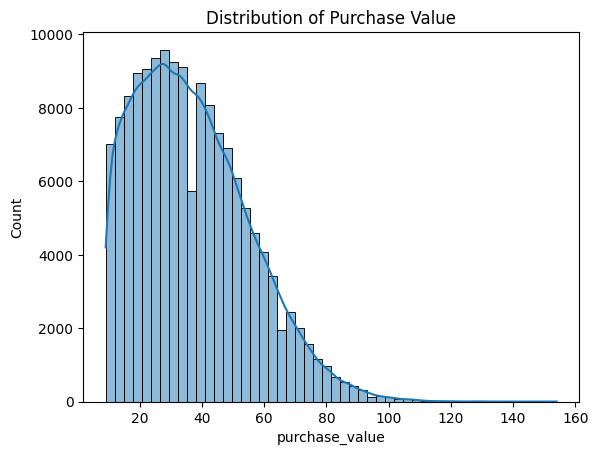

c:\Users\hp\Desktop\AI projects\fraud-detection-system\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='purchase_value'>

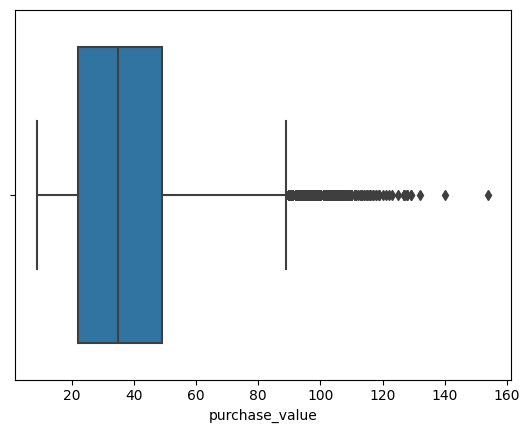

In [6]:
sns.histplot(fraud_df["purchase_value"], bins=50, kde=True)
plt.title("Distribution of Purchase Value")
plt.show()
sns.boxplot(x=fraud_df["purchase_value"])



c:\Users\hp\Desktop\AI projects\fraud-detection-system\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\AI projects\fraud-detection-system\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\AI projects\fraud-detection-system\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


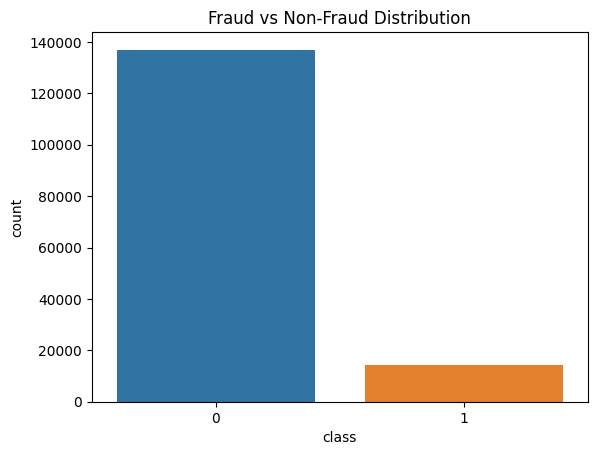

In [12]:
sns.countplot(x='class', data=fraud_df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()




## 4. Bivariate Analysis

We examine relationships between features and the fraud label.


c:\Users\hp\Desktop\AI projects\fraud-detection-system\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\AI projects\fraud-detection-system\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\AI projects\fraud-detection-system\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


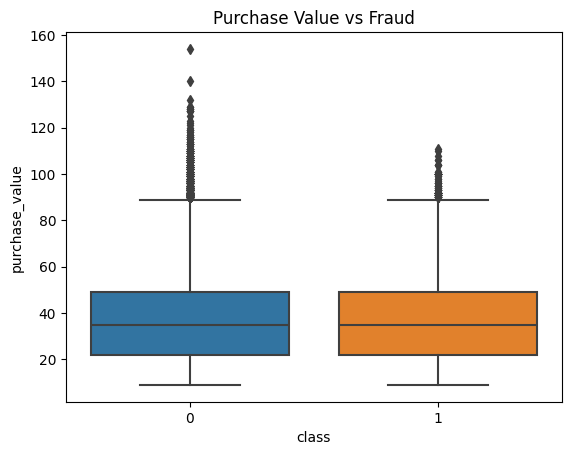

c:\Users\hp\Desktop\AI projects\fraud-detection-system\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\AI projects\fraud-detection-system\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\AI projects\fraud-detection-system\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\AI projects\fraud-detection-system\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categ

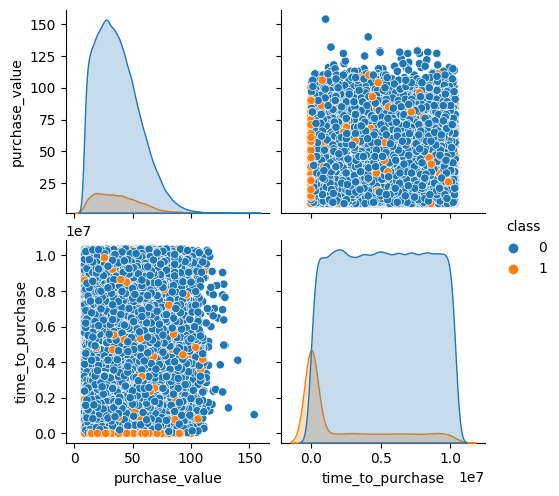

In [8]:
sns.boxplot(x="class", y="purchase_value", data=fraud_df)
plt.title("Purchase Value vs Fraud")
plt.show()



# Pairplot
sns.pairplot(fraud_df, hue="class", vars=["purchase_value", "time_to_purchase"])
plt.show()



## 5. Class Distribution Analysis

Fraud datasets are highly imbalanced. We quantify this imbalance.


c:\Users\hp\Desktop\AI projects\fraud-detection-system\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\AI projects\fraud-detection-system\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\AI projects\fraud-detection-system\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


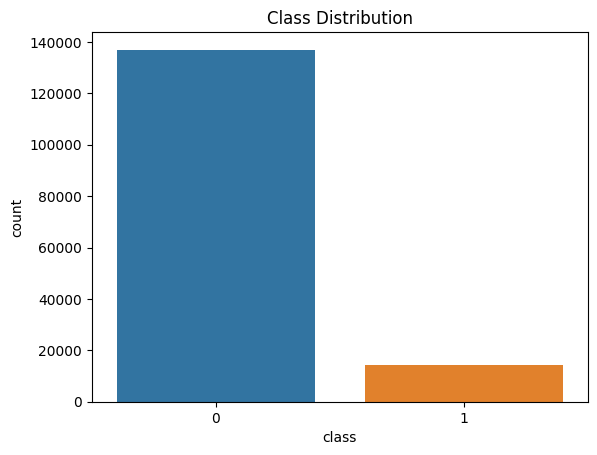

c:\Users\hp\Desktop\AI projects\fraud-detection-system\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\AI projects\fraud-detection-system\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\AI projects\fraud-detection-system\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\Desktop\AI projects\fraud-detection-system\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categ

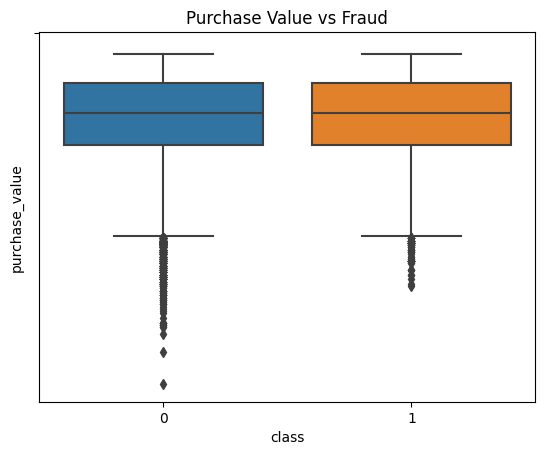

In [9]:
fraud_df["class"].value_counts(normalize=True) * 100
sns.countplot(x="class", data=fraud_df)
plt.title("Class Distribution")
plt.show()

# Boxplot of purchase_value by class
sns.boxplot(x=fraud_df["purchase_value"])
sns.boxplot(x="class", y="purchase_value", data=fraud_df)
plt.title("Purchase Value vs Fraud")
plt.show()
# # Boxplot of purchase_value by class
# sns.boxplot(x=fraud_df["purchase_value"])
# sns.boxplot(x="class", y="purchase_value", data=fraud_df)
# plt.title("Purchase Value vs Fraud")
# plt.show()

